In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import string   
import re
pd.set_option('display.max_columns', None)

In [3]:
data=pd.read_csv('raw_mobile_reviews.csv')
df=data.copy()
data.head()

FileNotFoundError: [Errno 2] File raw_mobile_reviews.csv does not exist: 'raw_mobile_reviews.csv'

In [5]:
def deEmojify(inputString):#to remove emojis in the text.
   try:
    return inputString.encode('ascii', 'ignore').decode('ascii') 
   except:
       return inputString

STOPWORDS=stopwords.words("english")    #most common unnecessary words. eg is, he, that, etc

def filter_text(text):
    text=text.strip('\n')
    text=deEmojify(str(text))
    text_cleaned="".join([x for x in text if x not in string.punctuation]) # remove punctuation
    
    text_cleaned=re.sub(' +', ' ', text_cleaned) # remove extra white spaces
 
    text_cleaned=text_cleaned.lower() # converting to lowercase
    tokens=text_cleaned.split(" ")
   
    tokens=[token for token in tokens if token not in STOPWORDS] # Taking only those words which are not stopwords
    text_cleaned = ' '.join([str(token) for token in tokens]) 
    
    return text_cleaned

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\msidd/nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\msidd\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [6]:
print(filter_text('This phone is awesome!. But the display quality and battery backup is not good. '))

NameError: name 'filter_text' is not defined

In [7]:
df['body']=df['body'].apply(lambda x:filter_text(x))

NameError: name 'df' is not defined

In [4]:
data=pd.read_csv('phone_reviews.csv')
df=data.copy()
data.head()

,Unnamed: 0,mobile_names,asin,title,body,star
0,0,"Samsung Galaxy M21 (Midnight Blue, 4GB RAM, 64...",B07HGJJ559,\nvalue money go it\n,update 15082020never give chance regret go ah...,4
1,1,"Samsung Galaxy M21 (Midnight Blue, 4GB RAM, 64...",B07HGJJ559,\n\n,title obviously monsterand good performance,5
2,2,"Samsung Galaxy M21 (Midnight Blue, 4GB RAM, 64...",B07HGJJ559,\nbest budget phone india\n,brilliant camera huge battery life brilliant ...,5
3,3,"Samsung Galaxy M21 (Midnight Blue, 4GB RAM, 64...",B07HGJJ559,\nbattery life upto mark\n,writing review using 6 daysi bought sumsung p...,3
4,4,"Samsung Galaxy M21 (Midnight Blue, 4GB RAM, 64...",B07HGJJ559,\nfeeling cheated\n,defective product received gets 8 12 hours ch...,1


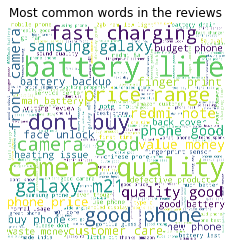

In [5]:
wordcloud = WordCloud(height=12000, width=12000, background_color='white')
wordcloud = wordcloud.generate(' '.join(df['body'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.savefig('word_cloud.png')

In [ ]:
sns.countplot(df['star']).set_title("Distribution of Reviews Category")

In [ ]:
df.to_csv('phone_reviews.csv')
df.to_excel("phone_reviews.xlsx")